# Time series analyis (Statistical Approach)
**- Vineet Gandham , vineet.gandham@gmail.com**

A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time.
These methods generally create a equation which has many terms and thier coeffiecients. Python helps in finding these equations and changing various parameters which are specific to each method.

All time series models are usable only if the series is stationary.
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. If a serious isn't stationary, we make it using help of differencing

The most common models for time series analyis are:
1. ARIMA (AutoRegressive Integrated Moving Average)
2. SARIMA (Seasonal- ARIMA)
3. AR (AutoRegressive)
4. MA (Moving Average)
5. VARIMA
6. VARMA
7. VAR

In [33]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the dataset
passengers=pd.read_csv('D:\\timeseriesforcasting\\Air-passengers-time-series-forecasting-master\\AirPassengers.csv')


In [5]:
passengers['Month']=pd.to_datetime(passengers['Month'],infer_datetime_format=True)
#change the data of month column to a standard date format which it infers on its own 
indexpassengers=passengers.set_index(['Month'])
#setting 'Month' column as index
indexpassengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


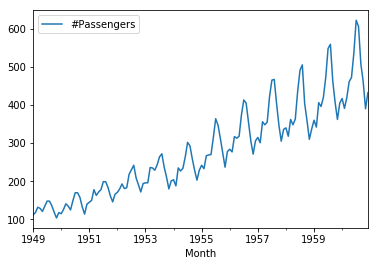

In [6]:
indexpassengers.plot()
#visually checking the graph of the data

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

(-5, 40)

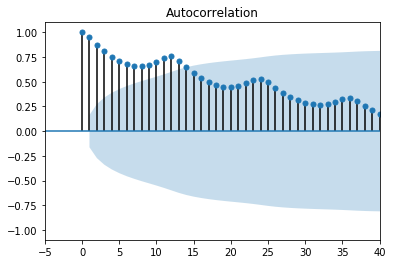

In [8]:
plot_acf(indexpassengers)#visually checking acf data without lag
plt.xlim([-5, 40])


### Arima Model

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. 

* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
* I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters

* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

**Identifying the order of differencing:**  

* d=0 if the series has no visible trend or ACF at all lags is low  
* d≥1 if the series has visible trend or positive ACF values out to a high number of lags   

**Note:**  
If after applying differencing to the series and the ACF at lag 1 is -0.5 or more negative the series may be overdifferenced.

**Note:**  
If you find the best d to be d=1 then the original series has a constant trend. A model with d=2 assumes that the original series has a time-varying trend.

Identifying the number of AR and MA terms

* p is equal to the first lag where the PACF value is above the significance level.

* q is equal to the first lag where the ACF value is above the significance level.

Dividing the data into training data, and testing data.
We use training data to get the function, and we test the result against a the test data. 
If it is accurate enough, we forecast it

In [9]:
percent_training=.80
split_point=round(len(indexpassengers)*percent_training)

In [10]:
X=indexpassengers.values
train=X[0:split_point]
test=X[split_point:]
test.size

29

Differencing in statistics is a transformation applied to time-series data in order to make it stationary. A stationary time series' properties do not depend on the time at which the series is observed.In order to difference the data, the difference between consecutive observations is computed

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


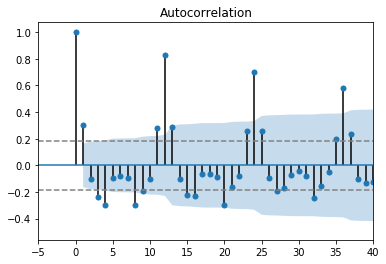

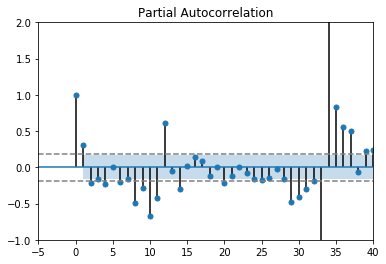

In [11]:
indexedpassdiff=indexpassengers.diff(periods=1) #creating a lag of one
indexedpassdiff=indexedpassdiff[1:]
#plotting after differencing
#plot acf
plot_acf(indexedpassdiff)
plt.xlim([-5, 40])
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray') #y=1.96/np.sqrt(len(train)) significance value formula
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
#plot pacf
plot_pacf(indexedpassdiff)
plt.xlim([-5, 40])
plt.ylim([-1, 2])
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')



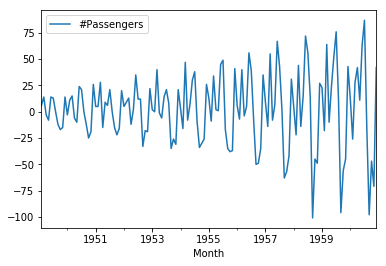

In [12]:
indexedpassdiff.plot()

The Akaike Information Critera (AIC) is a widely used measure of a statistical model. It basically quantifies 
* the goodness of fit
* the simplicity

When comparing two models, the one with the lower AIC is generally “better”
In the subsequent code, we create lists that contain various combination of p,d,q values.
There after we find AIC values for each , to find out the minimum and extract that required p,d,q value.

In [34]:
from statsmodels.tsa.arima_model import ARIMA
#creating the arima model
model_arima = ARIMA(train,order=(4, 1, 7))
#fitting the model and transferring the object to a variable
model_arima_fit = model_arima.fit(disp=False)
#calculating the AIC value
print(model_arima_fit.aic)

983.2070068773146


In [14]:
#forecasting
K=len(test)
forecast=model_arima_fit.forecast(K)[0]
print(forecast)


[486.4967116  431.51444453 375.53880465 359.96131433 371.12672266
 348.90420478 327.35115657 345.22259595 386.07953396 421.566184
 448.15696517 469.64292799 479.18315587 469.5394696  444.54443881
 414.30600977 387.17903174 369.18073252 365.41211996 378.14095387
 404.62400084 438.05539178 470.23011427 493.63877359 502.9410281
 496.31573496 476.14864403 448.40738471 420.94100228]


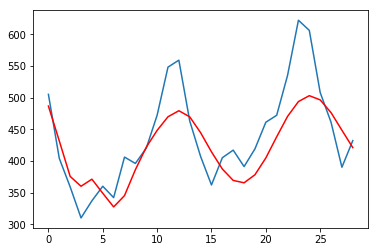

In [15]:
plt.plot(test)
plt.plot(forecast,color='red')

We can also find the smallest AIC value for a set of parameters, by trail and error using pythons functionality of loops

In [35]:
#Creating lists that have various combinations of p,d,q values

import itertools
p=q=range(4,5)
d=range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(4, 0, 4), (4, 1, 4)]

In [17]:
#Finding AIC values for each set of values
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(4, 1, 4) 1026.2795053036464


### SARIMA
Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
SARIMA models are denoted SARIMA(p,d,q)(P,D,Q), where S refers to the number of periods in each season, d is the degree of differencing (the number of times the data have had past values subtracted), and the uppercase P, D, and Q refer to the autoregressive, differencing, and moving average terms for the seasonal part of the ARIMA model.

Identifying the order of differencing:

* d=0 if the series has no visible trend or ACF at all lags is low.

* d≥1 if the series has visible trend or positive ACF values out to a high number of lags.

**Note:** If after applying differencing to the series and the ACF at lag 1 is -0.5 or more negative the series may be overdifferenced.

**Note:** If you find the best d to be d=1 then the original series has a constant trend. A model with d=2 assumes that the original series has a time-varying trend.

Identifying the number of AR and MA terms

* p is equal to the first lag where the PACF value is above the significance level.

* q is equal to the first lag where the ACF value is above the significance level.

Identifying the seasonal part of the model:

* S is equal to the ACF lag with the highest value (typically at a high lag).

* D=1 if the series has a stable seasonal pattern over time.

* D=0 if the series has an unstable seasonal pattern over time.

Rule of thumb: d+D≤2

* P≥1 if the ACF is positive at lag S, else P=0.

* Q≥1 if the ACF is negative at lag S, else Q=0.

Rule of thumb: P+Q≤2

In [25]:
s_percent_training=.70
s_split_point=round(len(indexpassengers)*s_percent_training)

In [26]:
s_X=indexpassengers.values
s_train=X[0:s_split_point]
s_test=X[s_split_point:]
s_test.size

43

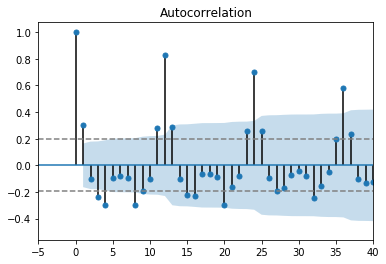

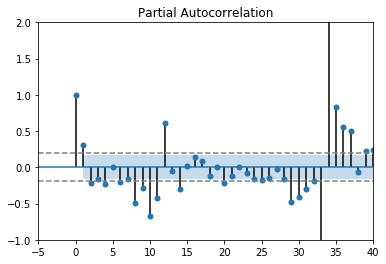

In [27]:
indexedpassdiff=indexpassengers.diff(periods=1) #creating a lag of one
indexedpassdiff=indexedpassdiff[1:]
#plotting after differencing
#plot acf
plot_acf(indexedpassdiff)
plt.xlim([-5, 40])
plt.axhline(y=1.96/np.sqrt(len(s_train)),linestyle='--',color='gray') #y=1.96/np.sqrt(len(train)) significance value formula
plt.axhline(y=-1.96/np.sqrt(len(s_train)),linestyle='--',color='gray')
#plot pacf
plot_pacf(indexedpassdiff)
plt.xlim([-5, 40])
plt.ylim([-1, 2])
plt.axhline(y=1.96/np.sqrt(len(s_train)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(s_train)),linestyle='--',color='gray')



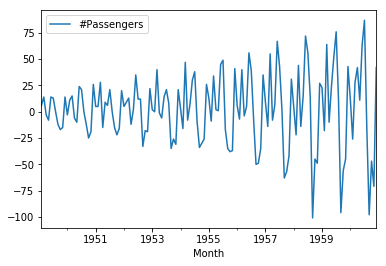

In [28]:
indexedpassdiff.plot()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#creating the sarima model
s_model=SARIMAX(s_train,order=(3,1,3),seasonal_order=(1,0,0,12),enforce_stationarity=False,enforce_invertibility=False)
#extracting the fitting model and transferring the object to a variable
s_model_fit=s_model.fit(disp=False)
print(s_model_fit.aic)

628.921323257417


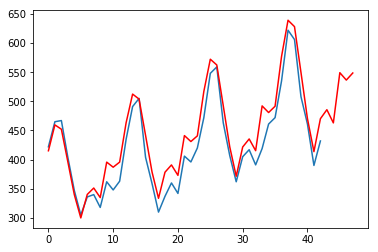

In [31]:
#forecasting
K=len(s_test)
s_forecast=s_model_fit.forecast(K+5)
plt.plot(s_test)
plt.plot(s_forecast,color='red')

### Conclusion

There is no perfect way to forecast, because all the techniques use methods which more or less utilise previous data.
Many techniques, including parameter checking(AIC,BIC, etc) along with plotting visually is used in general to assess the method of forecasting and the end result.
In this case, SARIMA has given the more accurate result, as our data set had a seasonal component which narrowed to a proper prediction. Likewise, an other data set might not have such an advantage.Therefore, we must use other methods such as VARIMA, etc. However ARIMA and SARIMA are the most commonly used.